<a href="https://colab.research.google.com/github/agrpriyank2807/corrosion_detection/blob/main/ML_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pickle
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Project_Files/data_cleaned_final_edited')
data=data.drop(columns='Unnamed: 0')


In [ ]:
data.head()

,Environment,Material Group,Material Family,Material,Concentration,Temperature,Duration,Rate
0,0,10,4,49,100.0,61.0,9936.0,1
1,0,10,4,55,70.0,118.0,4056.0,3
2,0,10,4,55,70.0,104.0,2400.0,0
3,0,10,4,55,50.0,92.0,5904.0,0
4,0,10,4,55,50.0,92.0,1944.0,1


In [ ]:
x=data.describe()

We have divided the dependent and independent features and are doing the feature scaling of the independent features.

In [ ]:
X=data.drop(columns='Rate')
y=data['Rate']
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20, random_state= 355)

In [ ]:
#boosting algorithms
#XGboost - accuracy
#GBT - accuracy

#tree methods 
#rf - accuracy
#decisiontress - accuracy

#SVM
#KNN

#Stacked model

#ANN

# XG-Boost Classifier

In [ ]:
import time

In [ ]:
start = time.time()
xgb = XGBClassifier(objective='multi:softmax')
xgb.fit(x_train,y_train)
print(xgb.score(x_test,y_test))
print(xgb.score(x_train,y_train))
end = time.time()
print(end - start)

0.7110016420361248
0.7623152709359606
1.1605310440063477


In [ ]:
xgb2=XGBClassifier(objective='multi:softmax')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(xgb2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(scores.mean())

0.7215160339373022


In [ ]:
gbt2=GradientBoostingClassifier()
scores = cross_val_score(gbt2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(scores.mean())

In [ ]:
clf2 = DecisionTreeClassifier()
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(scores.mean())

In [ ]:
clf2.fit(X,y)

In [ ]:
clf2.predict([[0,10,4,55,70.0,118.0,4056.0]])

# Gradient Boosting

In [ ]:
gbt= GradientBoostingClassifier(n_estimators= 300)
gbt.fit(x_train,y_train)
print(gbt.score(x_test,y_test))
print(gbt.score(x_train,y_train))

# Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [ ]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

Let us calculate the training accuracy of our decision tree

In [ ]:
clf.score(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

Let us do the hyperparameter tuning for this model

In [ ]:
'''
clf=DecisionTreeClassifier()
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
             }
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=10,
                    n_jobs =-1)
                    '''

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)
print(grid_search.best_score_)

Using the above hyperparameters we will tune our model

In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =15, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf.fit(x_train,y_train)

Let us check the accuracy of our model

In [ ]:
clf.score(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, clf.predict_proba(x_test), multi_class='ovr')

# Random Forest

In [ ]:
rand_clf = RandomForestClassifier(bootstrap=True,random_state=6,n_estimators=350)
rand_clf.fit(x_train,y_train)

In [ ]:
print("The training accuracy is:",rand_clf.score(x_train,y_train))
print("The testing accuracy is:",rand_clf.score(x_test,y_test))

# Stacking 

In [ ]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X_scaled,y,test_size=0.5, random_state= 355)

In [ ]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [ ]:
rfc=RandomForestClassifier(n_estimators = 300)
rfc.fit(x_train,y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test,y_test))

0.9843878389482333
0.7934426229508197


In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, rfc.predict_proba(x_test), multi_class='ovr')

0.8916687193518499

In [ ]:
svm = SVC(probability= True)
svm.fit(x_train,y_train)
svm.score(x_test,y_test)



0.6163934426229508

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, svm.predict_proba(x_test), multi_class='ovr')

0.75998355355134

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,weights = 'distance')
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
knn.score(x_train,y_train)


0.7245901639344262


0.9843878389482333

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr')

0.813334039848024

In [ ]:
'''
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
gridsearch = GridSearchCV(knn, param_grid,verbose=3)
gridsearch.fit(x_train,y_train)
'''

"\nparam_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],\n               'leaf_size' : [18,20,25,27,30,32,34],\n               'n_neighbors' : [3,5,7,9,10,11,12,13]\n              }\ngridsearch = GridSearchCV(knn, param_grid,verbose=3)\ngridsearch.fit(x_train,y_train)\n"

In [ ]:
#gridsearch.best_params_

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size =18, n_neighbors =7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
print(knn.score(x_train,y_train))
knn.score(x_test,y_test)

0.7584223500410846


0.6688524590163935

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr')

0.7834694725365176

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train))
gnb.score(x_test,y_test)

0.5825801150369762


0.5573770491803278

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, gnb.predict_proba(x_test), multi_class='ovr')

0.7037115979863142

In [ ]:
gbt= GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05)
gbt.fit(x_train,y_train)
print(gbt.score(x_train,y_train))
gbt.score(x_test,y_test)

0.8915365653245686


0.7672131147540984

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, gbt.predict_proba(x_test), multi_class='ovr')

0.8653704934504955

In [ ]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:

(abc.score(x_train,y_train))
print(abc.score(x_test,y_test))

0.6327868852459017


In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, abc.predict_proba(x_test), multi_class='ovr')

0.7340741528985795

In [ ]:
'''
param_grid= {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50,100, 150,200,250,300]
             }



# run grid search
grid_search = GridSearchCV(abc, param_grid,verbose=3)
'''

'\nparam_grid= {"base_estimator__criterion" : ["gini", "entropy"],\n              "base_estimator__splitter" :   ["best", "random"],\n              "n_estimators": [50,100, 150,200,250,300]\n             }\n\n\n\n# run grid search\ngrid_search = GridSearchCV(abc, param_grid,verbose=3)\n'

In [ ]:
xgb = XGBClassifier(objective='multi:softmax')
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

0.7344262295081967

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, xgb.predict_proba(x_test), multi_class='ovr')

0.8593417743332428

In [ ]:
#best
predict_val1 = rfc.predict(val_train)
predict_val2 = knn.predict(val_train)
predict_val3 = gbt.predict(val_train)
predict_val4 = xgb.predict(val_train)
predict_val5= svm.predict(val_train)

In [ ]:
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5))
predict_val

array([[1, 1, 1, 1, 1],
       [1, 1, 3, 3, 3],
       [3, 3, 3, 3, 3],
       ...,
       [3, 1, 3, 3, 1],
       [1, 0, 0, 0, 3],
       [2, 1, 2, 3, 3]])

In [ ]:
predict_test1 = rfc.predict(x_test)
predict_test2 = knn.predict(x_test)
predict_test3 = gbt.predict(x_test)
predict_test4= xgb.predict(x_test)
predict_test5= svm.predict(x_test)

In [ ]:
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5))

In [ ]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)
rand_clf.score(predict_test,y_test)

0.8032786885245902

In [ ]:
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
roc_auc_score(y_test, svm.predict_proba(x_test), multi_class='ovr')

0.75998355355134

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
'''
grid_param = {
    "n_estimators" : [90,100,115,130,150,200],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5,6,7],
    'min_samples_split': [1,2,3,4,5,6,7,8],
    'max_features' : ['auto','log2']
}
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
'''

'\ngrid_param = {\n    "n_estimators" : [90,100,115,130,150,200],\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'min_samples_leaf\' : [1,2,3,4,5,6,7],\n    \'min_samples_split\': [1,2,3,4,5,6,7,8],\n    \'max_features\' : [\'auto\',\'log2\']\n}\ngrid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)\n'

In [ ]:
#grid_search.fit(predict_val,val_test)

In [ ]:
#print(grid_search.best_score_)
#grid_search.best_params_

In [ ]:
rand_clf = RandomForestClassifier( criterion='entropy',max_features = 'log2',min_samples_leaf =3,min_samples_split=5 ,n_estimators =115)

In [ ]:
rand_clf.fit(predict_val,val_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=115,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rand_clf.score(predict_test,y_test)


0.8065573770491803

In [ ]:
roc_auc_score(y_test, rand_clf.predict_proba(predict_test), multi_class='ovr')

0.822996365560503

In [ ]:
#Plotting the confusion matrix
confusion_matrix(y_test, rand_clf.predict(predict_test),labels=[0,1,2,3])

array([[ 17,   3,   0,  12],
       [  2,  75,   2,   7],
       [  1,   7,   9,  13],
       [  1,   8,   3, 145]])

In [ ]:
predict_test

array([[0, 1, 0, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 1],
       ...,
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 1, 3, 1]])

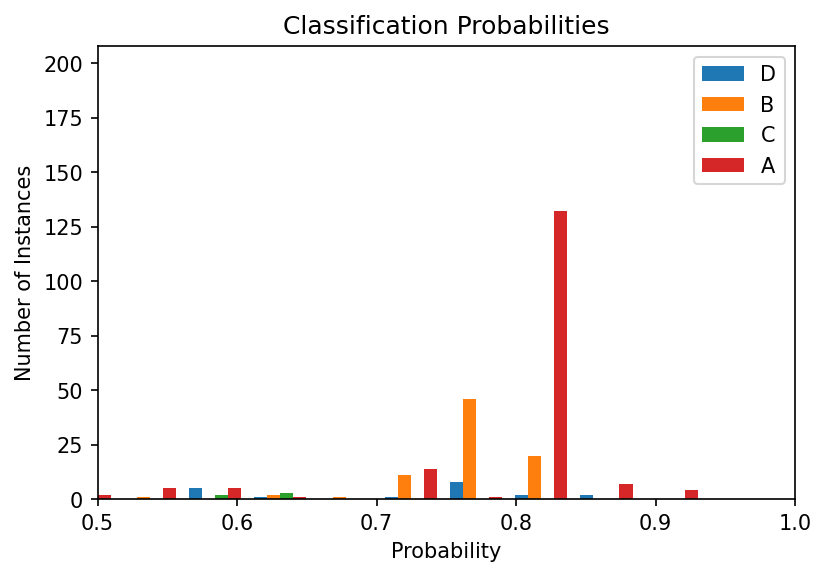

In [ ]:
target_names={'A','B','C','D'}
# get the probability distribution
probas = rand_clf.predict_proba(predict_test)
# plot
x=plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('Number of Instances')
plt.xlim([0.5, 1.0])
plt.legend(target_names)
x.show()
x.savefig('Class_fig')


In [ ]:
plt.savefig('Classification_probablities.png')

<Figure size 432x288 with 0 Axes>

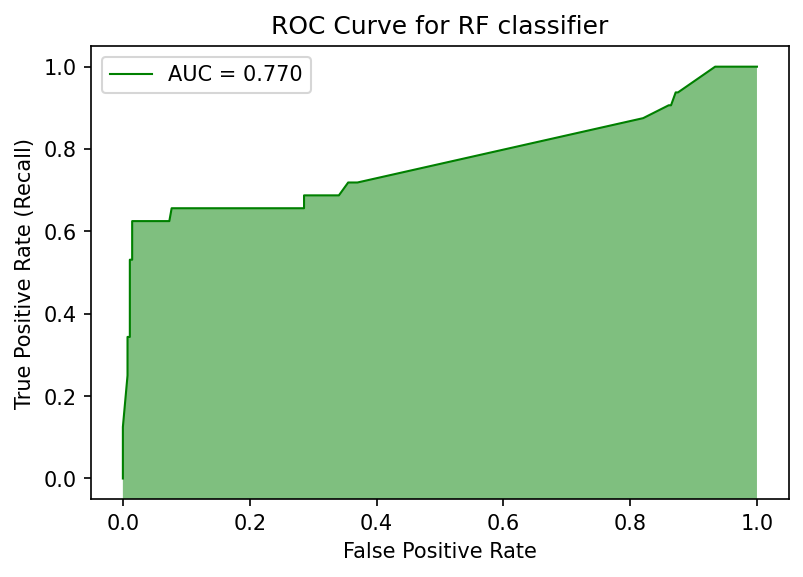

In [ ]:
probas = rand_clf.predict_proba(predict_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
x=plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.fill_between(fpr, tpr, -1, facecolor='green', alpha=0.5)
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
x.show()
x.savefig('ROC')


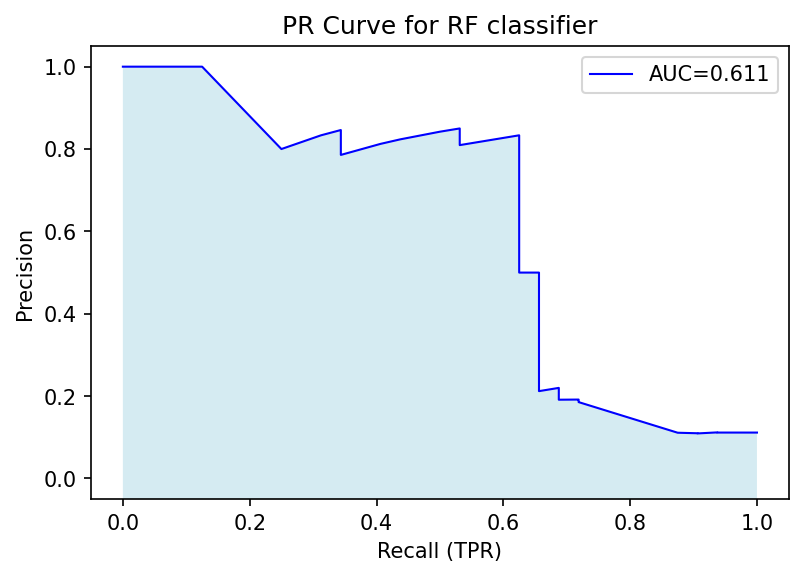

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
#avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
x=plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
x.show()
x.savefig('PR.png')